In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold,GridSearchCV,train_test_split,RandomizedSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier, plot_importance
from xgboost import XGBClassifier, XGBRFClassifier
from rfpimp import *
from sklearn.metrics import f1_score,classification_report,confusion_matrix,roc_auc_score
from tqdm import tqdm
import lightgbm as lgb
from vecstack import StackingTransformer
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
import warnings
from sklearn.metrics import f1_score
import ppscore as pps
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv('E:\\Machine Learning\\Analytics Vidhya Jobathon\\MAR 2022\\train_PDjVQMB.csv')
df_test = pd.read_csv('E:\\Machine Learning\\Analytics Vidhya Jobathon\\MAR 2022\\test_lTY72QC.csv')
df_sub = pd.read_csv('E:\\Machine Learning\\Analytics Vidhya Jobathon\\MAR 2022\\sample_OoSmYo5.csv')

In [3]:
df_train.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [4]:
df_test.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good


In [5]:
df_train.isnull().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

In [6]:
df_test.isnull().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
dtype: int64

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2851 non-null   object 
 1   Age                 2851 non-null   int64  
 2   Gender              2851 non-null   object 
 3   Income              2851 non-null   object 
 4   Balance             2851 non-null   float64
 5   Vintage             2851 non-null   int64  
 6   Transaction_Status  2851 non-null   int64  
 7   Product_Holdings    2851 non-null   object 
 8   Credit_Card         2851 non-null   int64  
 9   Credit_Category     2851 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 222.9+ KB


In [9]:
df_train.describe()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
count,6650.000000,6.650000e+03,6650.000000,6650.000000,6650.000000,6650.000000
mean,41.130226,8.045954e+05,2.250226,0.515789,0.664361,0.231128
std,9.685747,5.157549e+05,1.458795,0.499788,0.472249,0.421586
min,21.000000,6.300000e+01,0.000000,0.000000,0.000000,0.000000
25%,34.000000,3.922642e+05,1.000000,0.000000,0.000000,0.000000
50%,40.000000,7.649386e+05,2.000000,1.000000,1.000000,0.000000
75%,47.000000,1.147124e+06,3.000000,1.000000,1.000000,0.000000
max,72.000000,2.436616e+06,5.000000,1.000000,1.000000,1.000000


In [10]:
df_train.dtypes

ID                     object
Age                     int64
Gender                 object
Income                 object
Balance               float64
Vintage                 int64
Transaction_Status      int64
Product_Holdings       object
Credit_Card             int64
Credit_Category        object
Is_Churn                int64
dtype: object

In [11]:
df_test.dtypes

ID                     object
Age                     int64
Gender                 object
Income                 object
Balance               float64
Vintage                 int64
Transaction_Status      int64
Product_Holdings       object
Credit_Card             int64
Credit_Category        object
dtype: object

In [12]:
df_train.shape

(6650, 11)

In [13]:
df_test.shape

(2851, 10)

In [14]:
df_train['Is_Churn'].value_counts(normalize=True)

0    0.768872
1    0.231128
Name: Is_Churn, dtype: float64

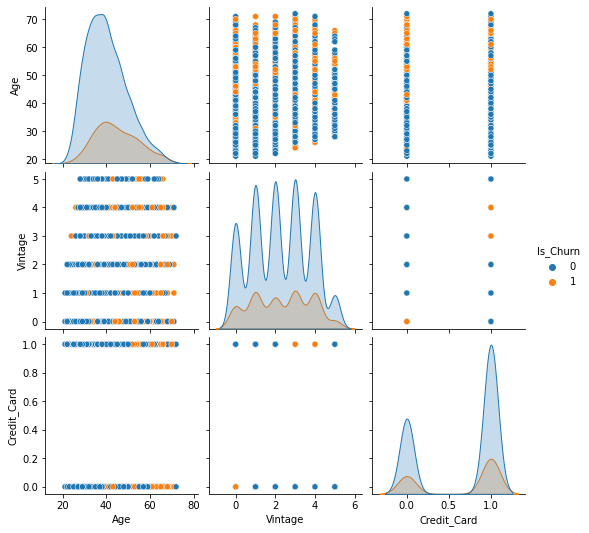

In [15]:
sns.pairplot(data=df_train[['Age','Gender','Vintage','Credit_Card','Is_Churn']],hue='Is_Churn',diag_kind='kde')

<AxesSubplot:xlabel='Age'>

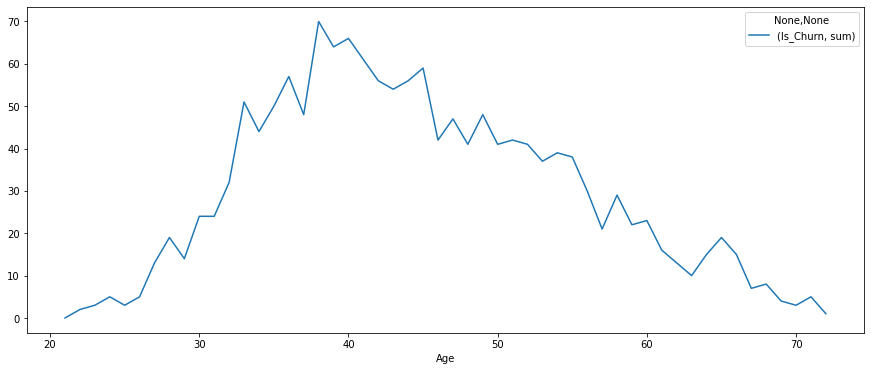

In [16]:
df_train.groupby('Age').agg({'Is_Churn':[sum]}).plot(figsize=(15,6))

<AxesSubplot:xlabel='Vintage'>

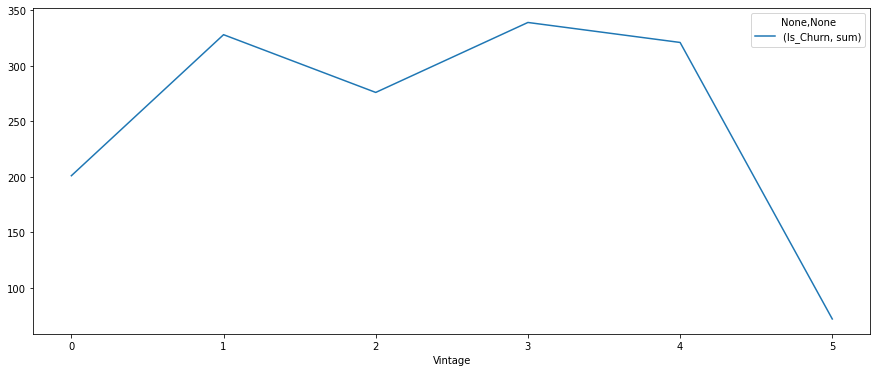

In [17]:
df_train.groupby('Vintage').agg({'Is_Churn':[sum]}).plot(figsize=(15,6))

<AxesSubplot:xlabel='Credit_Category'>

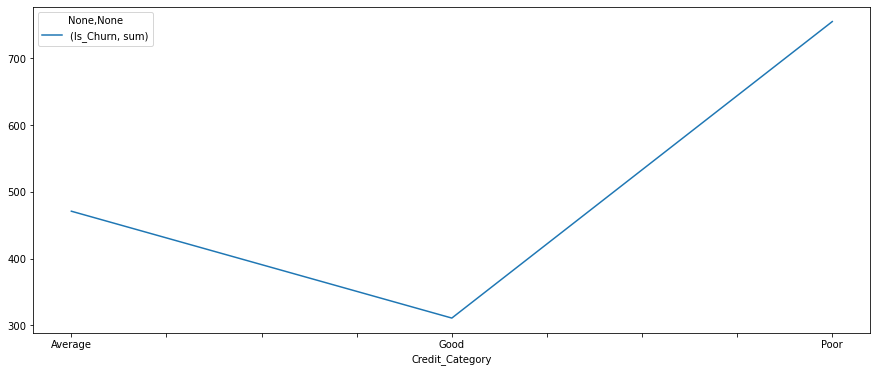

In [18]:
df_train.groupby('Credit_Category').agg({'Is_Churn':[sum]}).plot(figsize=(15,6))

<AxesSubplot:xlabel='Income'>

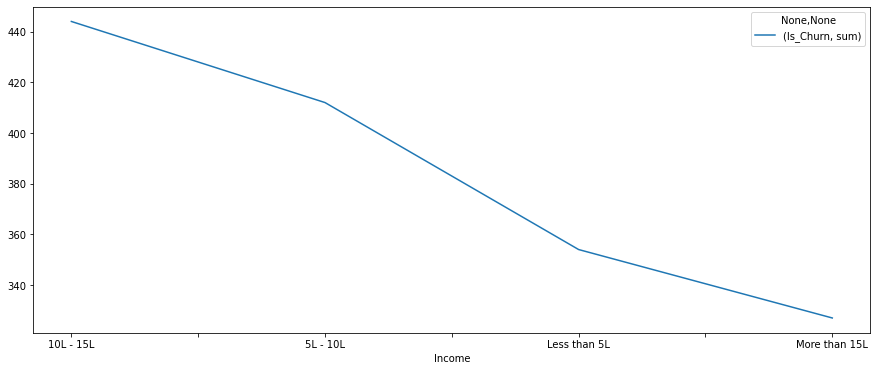

In [19]:
df_train.groupby('Income').agg({'Is_Churn':[sum]}).plot(figsize=(15,6))

<AxesSubplot:xlabel='Product_Holdings'>

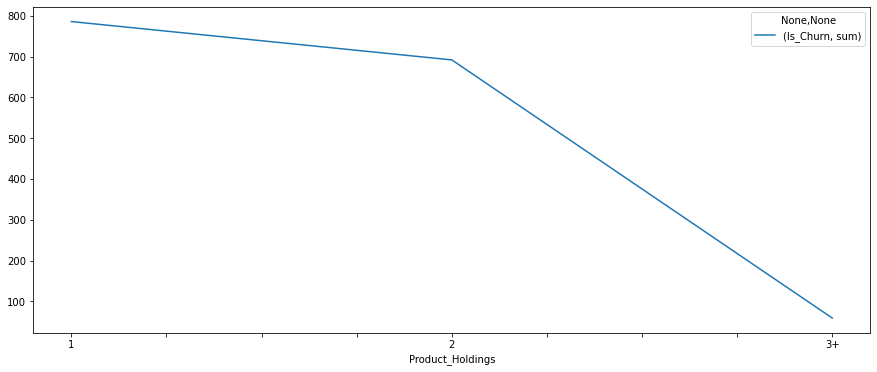

In [20]:
df_train.groupby('Product_Holdings').agg({'Is_Churn':[sum]}).plot(figsize=(15,6))

In [21]:
df_train=df_train.drop('ID',axis=1)
df_test=df_test.drop('ID',axis=1)

In [22]:
df_train

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1
...,...,...,...,...,...,...,...,...,...,...
6645,61,Male,5L - 10L,1354526.19,4,1,2,1,Poor,1
6646,42,Female,5L - 10L,596286.54,3,1,2,1,Average,0
6647,29,Male,Less than 5L,979298.19,2,0,2,0,Poor,0
6648,66,Female,10L - 15L,395233.65,3,0,2,1,Poor,1


In [23]:
column = df_train["Age"]
max_value = column.max() 
max_value

72

In [24]:
df_train['Age'] = pd.cut( x=df_train['Age'], bins=[10,15,20,25,30,35,40,45,50,55,60,65,72], labels=['10','15','20','25','30','35','40','45','50','55','60','65'] )
df_test['Age']  = pd.cut( x=df_test['Age'], bins=[10,15,20,25,30,35,40,45,50,55,60,65,72],  labels=['10','15','20','25','30','35','40','45','50','55','60','65'] )

In [25]:
df_train['Gender']=df_train['Gender'].apply(lambda x: 0 if x=="Male" else 1)
df_test['Gender']=df_test['Gender'].apply(lambda x: 0 if x=="Male" else 1)

In [26]:
def data_encoding( encoding_strategy,encoding_data,encoding_columns):
    encoding_data = pd.get_dummies(encoding_data)
    encoding_data.astype('int64').dtypes
    return encoding_data

In [27]:
df_train = data_encoding("OneHotEncoding", df_train ,["Age","Income","Product_Holdings","Credit_Category"])
df_test =  data_encoding("OneHotEncoding", df_test ,["Age","Income","Product_Holdings","Credit_Category"]) 

In [28]:
df_train

,Gender,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn,Age_10,Age_15,Age_20,Age_25,...,Income_10L - 15L,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Product_Holdings_1,Product_Holdings_2,Product_Holdings_3+,Credit_Category_Average,Credit_Category_Good,Credit_Category_Poor
0,1,563266.44,4,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,1,875572.11,2,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,1,701607.06,2,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,1,1393922.16,0,1,1,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,1,893146.23,1,1,1,1,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6645,0,1354526.19,4,1,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
6646,1,596286.54,3,1,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
6647,0,979298.19,2,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
6648,1,395233.65,3,0,1,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1


In [29]:
df_train['Age_10'].value_counts()
df_train['Age_15'].value_counts()

0    6650
Name: Age_15, dtype: int64

In [30]:
df_test['Age_10'].value_counts()
df_test['Age_15'].value_counts()

0    2851
Name: Age_15, dtype: int64

In [31]:
df_train=df_train.drop(['Age_10','Age_15'],axis=1)
df_test=df_test.drop(['Age_10','Age_15'],axis=1)

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = df_train['Balance'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
x_scaled
df_train['Balance'] = x_scaled

In [33]:
x1 = df_test['Balance'].values.reshape(-1, 1)
x1_scaled = scaler.fit_transform(x1)
x1_scaled
df_test['Balance'] = x1_scaled

In [34]:
x2 = df_train['Vintage'].values.reshape(-1, 1)
x2_scaled = scaler.fit_transform(x2)
x2_scaled
df_train['Vintage'] = x2_scaled

In [35]:
x3 = df_test['Vintage'].values.reshape(-1, 1)
x3_scaled = scaler.fit_transform(x3)
x3_scaled
df_test['Vintage'] = x3_scaled

In [36]:
df_train

,Gender,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn,Age_20,Age_25,Age_30,Age_35,...,Income_10L - 15L,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Product_Holdings_1,Product_Holdings_2,Product_Holdings_3+,Credit_Category_Average,Credit_Category_Good,Credit_Category_Poor
0,1,0.231148,0.8,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,1,0.359323,0.4,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,1,0.287925,0.4,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
3,1,0.572062,0.0,1,1,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,1,0.366536,0.2,1,1,1,0,0,0,1,...,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6645,0,0.555893,0.8,1,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
6646,1,0.244700,0.6,1,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
6647,0,0.401894,0.4,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
6648,1,0.162184,0.6,0,1,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1


In [37]:
df_test

,Gender,Balance,Vintage,Transaction_Status,Credit_Card,Age_20,Age_25,Age_30,Age_35,Age_40,...,Income_10L - 15L,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Product_Holdings_1,Product_Holdings_2,Product_Holdings_3+,Credit_Category_Average,Credit_Category_Good,Credit_Category_Poor
0,1,0.413891,0.4,1,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1,0,0.139709,0.4,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,1,0.179983,0.0,0,1,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3,0,0.011128,0.0,1,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
4,0,0.453303,0.4,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,1,0.549434,0.0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2847,1,0.594567,0.0,1,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
2848,0,0.451666,0.6,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2849,1,0.616980,0.4,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1


In [38]:
for col in df_train:
    print(f'{col}: {df_train[col].unique()}')

Gender: [1 0]
Balance: [0.23114764 0.35932285 0.28792483 ... 0.40189369 0.16218432 0.33936645]
Vintage: [0.8 0.4 0.  0.2 0.6 1. ]
Transaction_Status: [0 1]
Credit_Card: [0 1]
Is_Churn: [1 0]
Age_20: [0 1]
Age_25: [0 1]
Age_30: [0 1]
Age_35: [1 0]
Age_40: [0 1]
Age_45: [0 1]
Age_50: [0 1]
Age_55: [0 1]
Age_60: [0 1]
Age_65: [0 1]
Income_10L - 15L: [0 1]
Income_5L - 10L: [1 0]
Income_Less than 5L: [0 1]
Income_More than 15L: [0 1]
Product_Holdings_1: [1 0]
Product_Holdings_2: [0 1]
Product_Holdings_3+: [0 1]
Credit_Category_Average: [1 0]
Credit_Category_Good: [0 1]
Credit_Category_Poor: [0 1]


In [39]:
for col in df_test:
    print(f'{col}: {df_test[col].unique()}')

Gender: [1 0]
Balance: [0.41389086 0.1397088  0.17998256 ... 0.45166594 0.61697979 0.37491192]
Vintage: [0.4 0.  0.6 0.2 0.8 1. ]
Transaction_Status: [1 0]
Credit_Card: [1 0]
Age_20: [0 1]
Age_25: [0 1]
Age_30: [0 1]
Age_35: [0 1]
Age_40: [0 1]
Age_45: [1 0]
Age_50: [0 1]
Age_55: [0 1]
Age_60: [0 1]
Age_65: [0 1]
Income_10L - 15L: [0 1]
Income_5L - 10L: [0 1]
Income_Less than 5L: [0 1]
Income_More than 15L: [1 0]
Product_Holdings_1: [0 1]
Product_Holdings_2: [1 0]
Product_Holdings_3+: [0 1]
Credit_Category_Average: [1 0]
Credit_Category_Good: [0 1]
Credit_Category_Poor: [0 1]


In [40]:
df_train

,Gender,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn,Age_20,Age_25,Age_30,Age_35,...,Income_10L - 15L,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Product_Holdings_1,Product_Holdings_2,Product_Holdings_3+,Credit_Category_Average,Credit_Category_Good,Credit_Category_Poor
0,1,0.231148,0.8,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,1,0.359323,0.4,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,1,0.287925,0.4,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
3,1,0.572062,0.0,1,1,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,1,0.366536,0.2,1,1,1,0,0,0,1,...,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6645,0,0.555893,0.8,1,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
6646,1,0.244700,0.6,1,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
6647,0,0.401894,0.4,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
6648,1,0.162184,0.6,0,1,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1


In [41]:
X = df_train.drop('Is_Churn',axis='columns')
y = testLabels = df_train.Is_Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [42]:
y_train.value_counts()

0.0    4090
1.0    1230
Name: Is_Churn, dtype: int64

In [43]:
y.value_counts()

0.0    5113
1.0    1537
Name: Is_Churn, dtype: int64

In [44]:
5113/1537

3.3266102797657773

In [45]:
y_test.value_counts()

0.0    1023
1.0     307
Name: Is_Churn, dtype: int64

In [46]:
X_train.shape

(5320, 25)

In [47]:
X_test.shape

(1330, 25)

In [48]:
X_train[:10]

,Gender,Balance,Vintage,Transaction_Status,Credit_Card,Age_20,Age_25,Age_30,Age_35,Age_40,...,Income_10L - 15L,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Product_Holdings_1,Product_Holdings_2,Product_Holdings_3+,Credit_Category_Average,Credit_Category_Good,Credit_Category_Poor
308,0,0.288784,0.8,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4445,0,0.394127,0.2,0,1,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
6157,0,0.413460,0.4,1,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2894,0,0.724316,1.0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4978,0,0.628722,0.2,1,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2836,1,0.194138,0.8,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2544,1,0.708012,0.6,1,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4366,1,0.190121,0.2,1,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
959,0,0.149902,0.0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
2983,1,0.085367,0.2,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0


In [49]:
len(X_train.columns)

25

### Build a model (ANN) in tensorflow/keras

In [50]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report
from tensorflow_addons import losses

In [51]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(25, input_dim=25, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [52]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
167/167 [==============================] - 0s 584us/step - loss: 0.5383 - accuracy: 0.7660
Epoch 2/100
167/167 [==============================] - 0s 578us/step - loss: 0.5233 - accuracy: 0.7688
Epoch 3/100
167/167 [==============================] - 0s 554us/step - loss: 0.5179 - accuracy: 0.7688
Epoch 4/100
167/167 [==============================] - 0s 536us/step - loss: 0.5144 - accuracy: 0.7688
Epoch 5/100
167/167 [==============================] - 0s 578us/step - loss: 0.5121 - accuracy: 0.7692
Epoch 6/100
167/167 [==============================] - 0s 560us/step - loss: 0.5102 - accuracy: 0.7692
Epoch 7/100
167/167 [==============================] - 0s 555us/step - loss: 0.5093 - accuracy: 0.7707
Epoch 8/100
167/167 [==============================] - 0s 542us/step - loss: 0.5071 - accuracy: 0.7705
Epoch 9/100
167/167 [==============================] - 0s 536us/step - loss: 0.5058 - accuracy: 0.7707
Epoch 10/100
167/167 [==============================] - 0s 542us/step - l

167/167 [==============================] - 0s 542us/step - loss: 0.4557 - accuracy: 0.7932
Epoch 80/100
167/167 [==============================] - 0s 554us/step - loss: 0.4531 - accuracy: 0.7949
Epoch 81/100
167/167 [==============================] - 0s 530us/step - loss: 0.4557 - accuracy: 0.7915
Epoch 82/100
167/167 [==============================] - 0s 548us/step - loss: 0.4542 - accuracy: 0.7927
Epoch 83/100
167/167 [==============================] - 0s 530us/step - loss: 0.4525 - accuracy: 0.7949
Epoch 84/100
167/167 [==============================] - 0s 536us/step - loss: 0.4529 - accuracy: 0.7944
Epoch 85/100
167/167 [==============================] - 0s 542us/step - loss: 0.4523 - accuracy: 0.7957
Epoch 86/100
167/167 [==============================] - 0s 548us/step - loss: 0.4516 - accuracy: 0.7942
Epoch 87/100
167/167 [==============================] - 0s 542us/step - loss: 0.4515 - accuracy: 0.7932
Epoch 88/100
167/167 [==============================] - 0s 548us/step - loss:

### Method 1: Undersampling

In [53]:
# Class count
count_class_0, count_class_1 = df_train.Is_Churn.value_counts()

# Divide by class
df_class_0 = df_train[df_train['Is_Churn'] == 0]
df_class_1 = df_train[df_train['Is_Churn'] == 1]

In [54]:
count_class_0, count_class_1

(5113, 1537)

In [55]:
df_class_0.shape

(5113, 26)

In [56]:
df_class_1.shape

(1537, 26)

In [57]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Is_Churn.value_counts())

Random under-sampling:
0    1537
1    1537
Name: Is_Churn, dtype: int64


In [58]:
X = df_test_under.drop('Is_Churn',axis='columns')
y = df_test_under['Is_Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [59]:
# Number of classes in training Data
y_train.value_counts()

1    1230
0    1229
Name: Is_Churn, dtype: int64

In [60]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
77/77 [==============================] - 0s 553us/step - loss: 0.7005 - accuracy: 0.4961
Epoch 2/100
77/77 [==============================] - 0s 553us/step - loss: 0.6879 - accuracy: 0.5441
Epoch 3/100
77/77 [==============================] - 0s 566us/step - loss: 0.6804 - accuracy: 0.5677
Epoch 4/100
77/77 [==============================] - 0s 566us/step - loss: 0.6726 - accuracy: 0.5950
Epoch 5/100
77/77 [==============================] - 0s 579us/step - loss: 0.6654 - accuracy: 0.6092
Epoch 6/100
77/77 [==============================] - 0s 566us/step - loss: 0.6579 - accuracy: 0.6202
Epoch 7/100
77/77 [==============================] - 0s 566us/step - loss: 0.6543 - accuracy: 0.6210
Epoch 8/100
77/77 [==============================] - 0s 553us/step - loss: 0.6510 - accuracy: 0.6291
Epoch 9/100
77/77 [==============================] - 0s 553us/step - loss: 0.6471 - accuracy: 0.6312
Epoch 10/100
77/77 [==============================] - 0s 566us/step - loss: 0.6468 - accura

77/77 [==============================] - 0s 578us/step - loss: 0.5663 - accuracy: 0.6946
Epoch 82/100
77/77 [==============================] - 0s 553us/step - loss: 0.5651 - accuracy: 0.7044
Epoch 83/100
77/77 [==============================] - 0s 566us/step - loss: 0.5643 - accuracy: 0.6958
Epoch 84/100
77/77 [==============================] - 0s 566us/step - loss: 0.5630 - accuracy: 0.7015
Epoch 85/100
77/77 [==============================] - 0s 566us/step - loss: 0.5641 - accuracy: 0.6987
Epoch 86/100
77/77 [==============================] - 0s 540us/step - loss: 0.5621 - accuracy: 0.6970
Epoch 87/100
77/77 [==============================] - 0s 566us/step - loss: 0.5616 - accuracy: 0.7039
Epoch 88/100
77/77 [==============================] - 0s 553us/step - loss: 0.5606 - accuracy: 0.7007
Epoch 89/100
77/77 [==============================] - 0s 540us/step - loss: 0.5604 - accuracy: 0.7056
Epoch 90/100
77/77 [==============================] - 0s 566us/step - loss: 0.5595 - accuracy: 

### Method: Oversampling

In [61]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Is_Churn.value_counts())

Random over-sampling:
0    5113
1    5113
Name: Is_Churn, dtype: int64


In [62]:
X = df_test_over.drop('Is_Churn',axis='columns')
y = df_test_over['Is_Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [63]:
y_train.value_counts()

0    4090
1    4090
Name: Is_Churn, dtype: int64

In [64]:
y_test.value_counts()

1    1023
0    1023
Name: Is_Churn, dtype: int64

In [65]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
256/256 [==============================] - 0s 561us/step - loss: 0.6716 - accuracy: 0.5817
Epoch 2/100
256/256 [==============================] - 0s 556us/step - loss: 0.6545 - accuracy: 0.6060
Epoch 3/100
256/256 [==============================] - 0s 553us/step - loss: 0.6494 - accuracy: 0.6188
Epoch 4/100
256/256 [==============================] - 0s 557us/step - loss: 0.6455 - accuracy: 0.6202
Epoch 5/100
256/256 [==============================] - 0s 553us/step - loss: 0.6430 - accuracy: 0.6176
Epoch 6/100
256/256 [==============================] - 0s 565us/step - loss: 0.6403 - accuracy: 0.6244
Epoch 7/100
256/256 [==============================] - 0s 557us/step - loss: 0.6380 - accuracy: 0.6293
Epoch 8/100
256/256 [==============================] - 0s 553us/step - loss: 0.6366 - accuracy: 0.6259
Epoch 9/100
256/256 [==============================] - 0s 553us/step - loss: 0.6343 - accuracy: 0.6319
Epoch 10/100
256/256 [==============================] - 0s 557us/step - l

256/256 [==============================] - 0s 584us/step - loss: 0.5569 - accuracy: 0.7044
Epoch 80/100
256/256 [==============================] - 0s 553us/step - loss: 0.5567 - accuracy: 0.7079
Epoch 81/100
256/256 [==============================] - 0s 577us/step - loss: 0.5550 - accuracy: 0.7090
Epoch 82/100
256/256 [==============================] - 0s 565us/step - loss: 0.5548 - accuracy: 0.7072
Epoch 83/100
256/256 [==============================] - 0s 560us/step - loss: 0.5549 - accuracy: 0.7072
Epoch 84/100
256/256 [==============================] - 0s 561us/step - loss: 0.5550 - accuracy: 0.7043
Epoch 85/100
256/256 [==============================] - 0s 573us/step - loss: 0.5533 - accuracy: 0.7090
Epoch 86/100
256/256 [==============================] - 0s 561us/step - loss: 0.5530 - accuracy: 0.7081
Epoch 87/100
256/256 [==============================] - 0s 573us/step - loss: 0.5530 - accuracy: 0.7094
Epoch 88/100
256/256 [==============================] - 0s 565us/step - loss:

### Method3: SMOTE

In [66]:
X = df_train.drop('Is_Churn',axis='columns')
y = df_train['Is_Churn']

In [69]:
y.value_counts()

0    5113
1    1537
Name: Is_Churn, dtype: int64

In [70]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

1    5113
0    5113
Name: Is_Churn, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [72]:
y_train.value_counts()

0    4090
1    4090
Name: Is_Churn, dtype: int64

In [73]:
y_test.value_counts()

1    1023
0    1023
Name: Is_Churn, dtype: int64

In [74]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
256/256 [==============================] - 1s 1ms/step - loss: 0.6767 - accuracy: 0.5763
Epoch 2/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6448 - accuracy: 0.6236
Epoch 3/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6325 - accuracy: 0.6386
Epoch 4/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6256 - accuracy: 0.6495
Epoch 5/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6189 - accuracy: 0.6553
Epoch 6/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6142 - accuracy: 0.6641
Epoch 7/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6081 - accuracy: 0.6654
Epoch 8/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6027 - accuracy: 0.6700
Epoch 9/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5984 - accuracy: 0.6724
Epoch 10/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5921 - accura

256/256 [==============================] - 0s 2ms/step - loss: 0.4903 - accuracy: 0.7518
Epoch 82/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4905 - accuracy: 0.7516
Epoch 83/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4905 - accuracy: 0.7504
Epoch 84/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4910 - accuracy: 0.7491
Epoch 85/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4872 - accuracy: 0.7557
Epoch 86/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4884 - accuracy: 0.7517
Epoch 87/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4887 - accuracy: 0.7510
Epoch 88/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4885 - accuracy: 0.7488
Epoch 89/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4868 - accuracy: 0.7520
Epoch 90/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4869 - accuracy: 

In [85]:
model = keras.Sequential([
        keras.layers.Dense(25, input_dim=25, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
weights = -1    
if weights == -1:
    model.fit(X_train, y_train, epochs=100)
else:
    model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
print(model.evaluate(X_test, y_test))
    


Epoch 1/100
256/256 [==============================] - 1s 2ms/step - loss: 0.6739 - accuracy: 0.5823
Epoch 2/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.6276
Epoch 3/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6318 - accuracy: 0.6430
Epoch 4/100
256/256 [==============================] - 0s 1ms/step - loss: 0.6241 - accuracy: 0.6471
Epoch 5/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6175 - accuracy: 0.6566
Epoch 6/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6124 - accuracy: 0.6606
Epoch 7/100
256/256 [==============================] - 0s 2ms/step - loss: 0.6062 - accuracy: 0.6610
Epoch 8/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5988 - accuracy: 0.6691
Epoch 9/100
256/256 [==============================] - 0s 1ms/step - loss: 0.5945 - accuracy: 0.6710
Epoch 10/100
256/256 [==============================] - 0s 2ms/step - loss: 0.5874 - accura

256/256 [==============================] - 0s 2ms/step - loss: 0.4808 - accuracy: 0.7615
Epoch 82/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4797 - accuracy: 0.7612
Epoch 83/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.7615
Epoch 84/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.7616
Epoch 85/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4788 - accuracy: 0.7625
Epoch 86/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4783 - accuracy: 0.7636
Epoch 87/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4768 - accuracy: 0.7645
Epoch 88/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4783 - accuracy: 0.7620
Epoch 89/100
256/256 [==============================] - 0s 1ms/step - loss: 0.4756 - accuracy: 0.7623
Epoch 90/100
256/256 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 

In [86]:
y_preds = model.predict(X_test)
y_preds = np.round(y_preds)
    
print("Classification Report: \n", classification_report(y_test, y_preds))

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.56      0.66      1023
           1       0.66      0.85      0.74      1023

    accuracy                           0.71      2046
   macro avg       0.73      0.71      0.70      2046
weighted avg       0.73      0.71      0.70      2046



In [87]:
final_predictions = model.predict(df_test)
final_predictions = np.round(final_predictions)
df_sub['Is_Churn'] = final_predictions
#only positive predictions for the target variable
df_sub['Is_Churn'] = df_sub['Is_Churn'].apply(lambda x: 0 if x<0 else x)
df_sub.to_csv('my_submission6.csv', index=False)

In [90]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
model1.fit(X_train, y_train)

GaussianNB()

In [91]:
y_pred = model1.predict(X_test)
y_pred = np.round(y_pred)

In [93]:
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.36      0.48      1023
           1       0.57      0.84      0.68      1023

    accuracy                           0.60      2046
   macro avg       0.63      0.60      0.58      2046
weighted avg       0.63      0.60      0.58      2046



In [94]:
final_predictions = model1.predict(df_test)
final_predictions = np.round(final_predictions)
df_sub['Is_Churn'] = final_predictions
#only positive predictions for the target variable
df_sub['Is_Churn'] = df_sub['Is_Churn'].apply(lambda x: 0 if x<0 else x)
df_sub.to_csv('my_submission7.csv', index=False)

In [131]:
cv = StratifiedKFold(n_splits=10,random_state=22,shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
score_avg = []
for (train, test), i in zip(cv.split(df_train, y), range(10)):
    m = lgb.LGBMClassifier(n_jobs=-1,random_state=22,learning_rate=0.1,n_estimators=520,scale_pos_weight=3,
                       colsample_bytree=0.5,num_leaves=31,min_child_samples=20,lambda_l1=1.6,lambda_l2=4) 
    
    m.fit(df_train.drop(columns='Is_Churn').iloc[train], y.iloc[train])
    score_avg.append(f1_score(y_pred=m.predict(df_train.drop(columns='Is_Churn').iloc[test]),y_true=y.iloc[test]))
print(pd.DataFrame(data=score_avg))
print(sum(score_avg)/len(score_avg))

[LightGBM] [Warning] lambda_l1 is set=1.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6
[LightGBM] [Warning] lambda_l2 is set=4, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4
[LightGBM] [Warning] lambda_l1 is set=1.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6
[LightGBM] [Warning] lambda_l2 is set=4, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4
[LightGBM] [Warning] lambda_l1 is set=1.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6
[LightGBM] [Warning] lambda_l2 is set=4, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4
[LightGBM] [Warning] lambda_l1 is set=1.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6
[LightGBM] [Warning] lambda_l2 is set=4, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4
[LightGBM] [Warning] lambda_l1 is set=1.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6
[LightGBM] [Warning] lambda_l2 is set=4, reg_lambda=0.0 will be ignored. Current valu

In [132]:
final_predictions = m.predict(df_test)
final_predictions = np.round(final_predictions)
df_sub['Is_Churn'] = final_predictions
#only positive predictions for the target variable
df_sub['Is_Churn'] = df_sub['Is_Churn'].apply(lambda x: 0 if x<0 else x)
df_sub.to_csv('my_submission15.csv', index=False)

In [142]:
cv = StratifiedKFold(n_splits=10,random_state=22,shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
score_avg = []
for (train, test), i in zip(cv.split(X_train, y_train), range(10)):
    m = lgb.LGBMClassifier(n_jobs=-1,random_state=22,scale_pos_weight=3,learning_rate=0.1,n_estimators=520,
                       colsample_bytree=0.5,num_leaves=31,min_child_samples=20,lambda_l1=1.6,lambda_l2=4)
    
    m.fit(X_train.iloc[train], y_train.iloc[train])
    score_avg.append(f1_score(y_pred=m.predict(X_train.iloc[test]),y_true=y_train.iloc[test]))
print(pd.DataFrame(data=score_avg))
print(sum(score_avg)/len(score_avg))

[LightGBM] [Warning] lambda_l1 is set=1.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6
[LightGBM] [Warning] lambda_l2 is set=4, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4
[LightGBM] [Warning] lambda_l1 is set=1.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6
[LightGBM] [Warning] lambda_l2 is set=4, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4
[LightGBM] [Warning] lambda_l1 is set=1.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6
[LightGBM] [Warning] lambda_l2 is set=4, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4
[LightGBM] [Warning] lambda_l1 is set=1.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6
[LightGBM] [Warning] lambda_l2 is set=4, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4
[LightGBM] [Warning] lambda_l1 is set=1.6, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6
[LightGBM] [Warning] lambda_l2 is set=4, reg_lambda=0.0 will be ignored. Current valu

In [143]:
final_predictions = m.predict(df_test)
final_predictions = np.round(final_predictions)
df_sub['Is_Churn'] = final_predictions
#only positive predictions for the target variable
df_sub.to_csv('new_submission5.csv', index=False)

In [112]:
import xgboost as xgb

In [141]:
cv = StratifiedKFold(n_splits=10,random_state=22,shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
score_avg = []
for (train, test), i in zip(cv.split(X_train, y_train), range(10)):
    x = xgb.XGBClassifier(n_jobs=-1,random_state=22,scale_pos_weight=3,learning_rate=0.1,n_estimators=100, min_child_weight= 19,
                       colsample_bytree=0.4,objective='binary:logistic',eval_metric= 'logloss') 
    
    x.fit(X_train.iloc[train], y_train.iloc[train])
    score_avg.append(f1_score(y_pred=x.predict(X_train.iloc[test]),y_true=y_train.iloc[test]))
print(pd.DataFrame(data=score_avg))
print(sum(score_avg)/len(score_avg))

          0
0  0.738636
1  0.736232
2  0.723735
3  0.720379
4  0.740234
5  0.717850
6  0.737354
7  0.738550
8  0.737044
9  0.734574
0.7324589262989667


In [116]:
final_predictions = x.predict(df_test)
final_predictions = np.round(final_predictions)
df_sub['Is_Churn'] = final_predictions
#only positive predictions for the target variable
df_sub['Is_Churn'] = df_sub['Is_Churn'].apply(lambda x: 0 if x<0 else x)
df_sub.to_csv('my_submission10.csv', index=False)

In [119]:
cv = StratifiedKFold(n_splits=10,random_state=22,shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
score_avg = []
for (train, test), i in zip(cv.split(X_train, y_train), range(10)):
    rf = RandomForestClassifier(n_estimators=20,criterion='gini', max_features=3, bootstrap= False, min_samples_split=1.0,
                             max_depth=None, min_samples_leaf=10) 
    
    rf.fit(X_train.iloc[train], y_train.iloc[train])
    score_avg.append(f1_score(y_pred=rf.predict(X_train.iloc[test]),y_true=y_train.iloc[test]))
print(pd.DataFrame(data=score_avg))
print(sum(score_avg)/len(score_avg))

          0
0  0.675174
1  0.658740
2  0.661780
3  0.678571
4  0.653422
5  0.606577
6  0.688770
7  0.657016
8  0.638614
9  0.664523
0.6583186670186418


In [120]:
final_predictions = rf.predict(df_test)
final_predictions = np.round(final_predictions)
df_sub['Is_Churn'] = final_predictions
#only positive predictions for the target variable
df_sub['Is_Churn'] = df_sub['Is_Churn'].apply(lambda x: 0 if x<0 else x)
df_sub.to_csv('my_submission11.csv', index=False)

In [121]:
cv = StratifiedKFold(n_splits=10,random_state=22,shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
score_avg = []
for (train, test), i in zip(cv.split(X_train, y_train), range(10)):
    rf2 = RandomForestClassifier(n_estimators=20, criterion='entropy', max_features=3, bootstrap= False, min_samples_split=1.0,
     max_depth=None, min_samples_leaf=7) 
    
    rf2.fit(X_train.iloc[train], y_train.iloc[train])
    score_avg.append(f1_score(y_pred=rf2.predict(X_train.iloc[test]),y_true=y_train.iloc[test]))
print(pd.DataFrame(data=score_avg))
print(sum(score_avg)/len(score_avg))

          0
0  0.689581
1  0.675737
2  0.638923
3  0.610630
4  0.663677
5  0.691924
6  0.658120
7  0.631953
8  0.612403
9  0.629073
0.6502020814259168


In [123]:
from sklearn import svm
cv = StratifiedKFold(n_splits=10,random_state=22,shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
score_avg = []
for (train, test), i in zip(cv.split(X_train, y_train), range(10)):
    svc = svm.SVC(kernel='linear', C=1, gamma=0.001) 
    
    svc.fit(X_train.iloc[train], y_train.iloc[train])
    score_avg.append(f1_score(y_pred=svc.predict(X_train.iloc[test]),y_true=y_train.iloc[test]))
print(pd.DataFrame(data=score_avg))
print(sum(score_avg)/len(score_avg))

          0
0  0.698002
1  0.684274
2  0.646707
3  0.669065
4  0.658080
5  0.647887
6  0.660310
7  0.653207
8  0.664303
9  0.673123
0.665495697464066


In [124]:
final_predictions = svc.predict(df_test)
final_predictions = np.round(final_predictions)
df_sub['Is_Churn'] = final_predictions
#only positive predictions for the target variable
df_sub['Is_Churn'] = df_sub['Is_Churn'].apply(lambda x: 0 if x<0 else x)
df_sub.to_csv('my_submission12.csv', index=False)

In [133]:
preds_xgb = x.predict_proba(df_test)
preds_lgb = m.predict_proba(df_test)

In [134]:
df_sub['Is_Churn'] = preds_xgb[:,1]*0.4 + preds_lgb[:,1]*0.6

In [135]:
df_sub['Is_Churn'] = df_sub['Is_Churn'].apply(lambda x: 1 if x>0.5 else 0)

In [136]:
df_sub.to_csv('my_submission16.csv', index=False)

In [137]:
cv = StratifiedKFold(n_splits=10,random_state=22,shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
score_avg = []
for (train, test), i in zip(cv.split(X_train, y_train), range(10)):
    m = lgb.LGBMClassifier(n_jobs=-1,random_state=22,objective='binary',scale_pos_weight=3,learning_rate=0.0451,n_estimators=381,subsample_freq=1,subsample=0.8,min_split_gain=0.5696,
                       colsample_bytree=0.25,num_leaves=2680,min_child_samples=200,reg_alpha=5,reg_lambda=40,max_depth=7)
    
    m.fit(X_train.iloc[train], y_train.iloc[train])
    score_avg.append(f1_score(y_pred=m.predict(X_train.iloc[test]),y_true=y_train.iloc[test]))
print(pd.DataFrame(data=score_avg))
print(sum(score_avg)/len(score_avg))

          0
0  0.714029
1  0.722426
2  0.700183
3  0.694245
4  0.711152
5  0.712727
6  0.712204
7  0.714545
8  0.710909
9  0.716774
0.7109193831653186


In [138]:
from sklearn.linear_model import LogisticRegression

cv = StratifiedKFold(n_splits=10,random_state=22,shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
score_avg = []
for (train, test), i in zip(cv.split(X_train, y_train), range(10)):
    lr = LogisticRegression(n_jobs=-1,random_state=22,class_weight='balanced',solver='saga',C=0.22,penalty='l2')
                            
                            
    lr.fit(X_train.iloc[train], y_train.iloc[train])
    score_avg.append(f1_score(y_pred=lr.predict(X_train.iloc[test]),y_true=y_train.iloc[test]))
print(pd.DataFrame(data=score_avg))
print(sum(score_avg)/len(score_avg))

          0
0  0.683453
1  0.697561
2  0.660099
3  0.644848
4  0.657734
5  0.634027
6  0.701711
7  0.660891
8  0.673810
9  0.699507
0.671364211150226


In [139]:
X_train

,Gender,Balance,Vintage,Transaction_Status,Credit_Card,Age_20,Age_25,Age_30,Age_35,Age_40,...,Income_10L - 15L,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Product_Holdings_1,Product_Holdings_2,Product_Holdings_3+,Credit_Category_Average,Credit_Category_Good,Credit_Category_Poor
4141,0,0.523698,0.400000,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
10092,1,0.266651,0.075723,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
3848,0,0.383984,0.600000,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
9376,0,0.345145,0.229743,1,1,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1471,0,0.082288,0.400000,1,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3567,0,0.306367,0.800000,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
9967,0,0.466982,0.638058,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
47,1,0.354972,0.600000,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3916,0,0.101158,0.000000,1,1,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0


,Gender,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn,Age_20,Age_25,Age_30,Age_35,...,Income_10L - 15L,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Product_Holdings_1,Product_Holdings_2,Product_Holdings_3+,Credit_Category_Average,Credit_Category_Good,Credit_Category_Poor
0,1,0.231148,0.8,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,1,0.359323,0.4,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,1,0.287925,0.4,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
3,1,0.572062,0.0,1,1,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,1,0.366536,0.2,1,1,1,0,0,0,1,...,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6645,0,0.555893,0.8,1,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
6646,1,0.244700,0.6,1,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
6647,0,0.401894,0.4,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
6648,1,0.162184,0.6,0,1,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1


In [ ]:
cv = StratifiedKFold(n_splits=10,random_state=22,shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
score_avg = []
for (train, test), i in zip(cv.split(X_train, y_train), range(10)):
    cb = CatBoostClassifier(iterations=5, learning_rate=0.1) 
                            
                            
    cb.fit(X_train.iloc[train], y_train.iloc[train])
    score_avg.append(f1_score(y_pred=cb.predict(X_train.iloc[test]),y_true=y_train.iloc[test]))
print(pd.DataFrame(data=score_avg))
print(sum(score_avg)/len(score_avg))